# Day 08. Exercise 04
# Regression

## 0. Imports

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.inspection import permutation_importance

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [37]:
df = pd.read_csv('../data/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [38]:
df.isna().sum()

uid             0
num_commits     0
pageviews      18
AVG(diff)      59
dtype: int64

In [39]:
df['pageviews'] = df['pageviews'].fillna(0)
df['AVG(diff)'] = df['AVG(diff)'].fillna(0)

df.isna().sum()

uid            0
num_commits    0
pageviews      0
AVG(diff)      0
dtype: int64

In [40]:
df = pd.get_dummies(df, columns=['uid'], drop_first=True)

In [41]:
X = df.drop(columns=['AVG(diff)'])
y = df['AVG(diff)']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [28]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    results = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        results.append((train_rmse, test_rmse))
        print(f'train - {train_rmse}   |   test - {test_rmse}')

    average_rmse = np.mean([result[1] for result in results])
    print(f'Average RMSE on crossval is {average_rmse}')

In [52]:
lin_reg = LinearRegression()

In [54]:
print("Linear Regression:\n")
crossval(10, X, y, lin_reg)

Linear Regression:

train - 5.545669076423133e-13   |   test - 71.80324612019514
train - 7.187737290695948e-13   |   test - 35.96382143176106
train - 4.2367033518584157e-13   |   test - 1.8078740283857434e-13
train - 4.660644652036815e-13   |   test - 34.13658599222904
train - 5.174940903254002e-13   |   test - 43.59825129362216
train - 1.1226385858184615e-12   |   test - 19.581427842824336
train - 1.5378742234880389e-12   |   test - 62.99430527877908
train - 2.991004433823351e-13   |   test - 5.5003032960207685
train - 4.766763587232755e-13   |   test - 68.33291408329939
train - 5.350869307434952e-13   |   test - 79.49257770465191
Average RMSE on crossval is 42.14034330433831


In [84]:
tree_reg = DecisionTreeRegressor(random_state=21, max_depth=1)
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 21,
 'splitter': 'best'}

In [85]:
print("\nDecision Tree Regressor:")
crossval(10, X, y, tree_reg)


Decision Tree Regressor:
train - 25.880997916233767   |   test - 55.697392555666376
train - 32.08012635514713   |   test - 0.8620463552994769
train - 32.081394602317864   |   test - 0.0
train - 31.475440793059008   |   test - 18.75392764514616
train - 31.052844998507652   |   test - 23.765952936532578
train - 30.113743972078822   |   test - 33.43055280642105
train - 30.244320460023015   |   test - 32.15217116245914
train - 30.853993063381314   |   test - 25.733822310854702
train - 29.956904973849433   |   test - 34.440563475884694
train - 28.81650709404577   |   test - 45.47979538767149
Average RMSE on crossval is 27.031622463593568


In [94]:
forest_reg = RandomForestRegressor(random_state=21, max_depth=1)
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

In [95]:
print("\nRandom Forest Regressor:")
crossval(10, X, y, forest_reg)


Random Forest Regressor:
train - 25.676677273128625   |   test - 55.805849507281025
train - 31.52488626480044   |   test - 0.6804963187965958
train - 31.448219198313087   |   test - 0.6808113975576662
train - 31.181140927332606   |   test - 18.861687090855064
train - 30.600044108765292   |   test - 23.559361971996765
train - 30.06976482820192   |   test - 33.12915055955227
train - 29.828470673568525   |   test - 31.260681199214257
train - 30.625162844746722   |   test - 24.109957361051674
train - 28.56216827592856   |   test - 35.99594761160439
train - 27.519057123636184   |   test - 48.97823979713157
Average RMSE on crossval is 27.306218281504123


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [107]:
y_test

3       0.0
19    -17.5
14    -48.5
45   -223.6
10      0.0
54      0.0
23      0.0
29      0.0
24      0.0
13    -89.0
22      0.0
57      0.0
17      0.0
31      0.0
39      0.0
40      0.0
Name: AVG(diff), dtype: float64

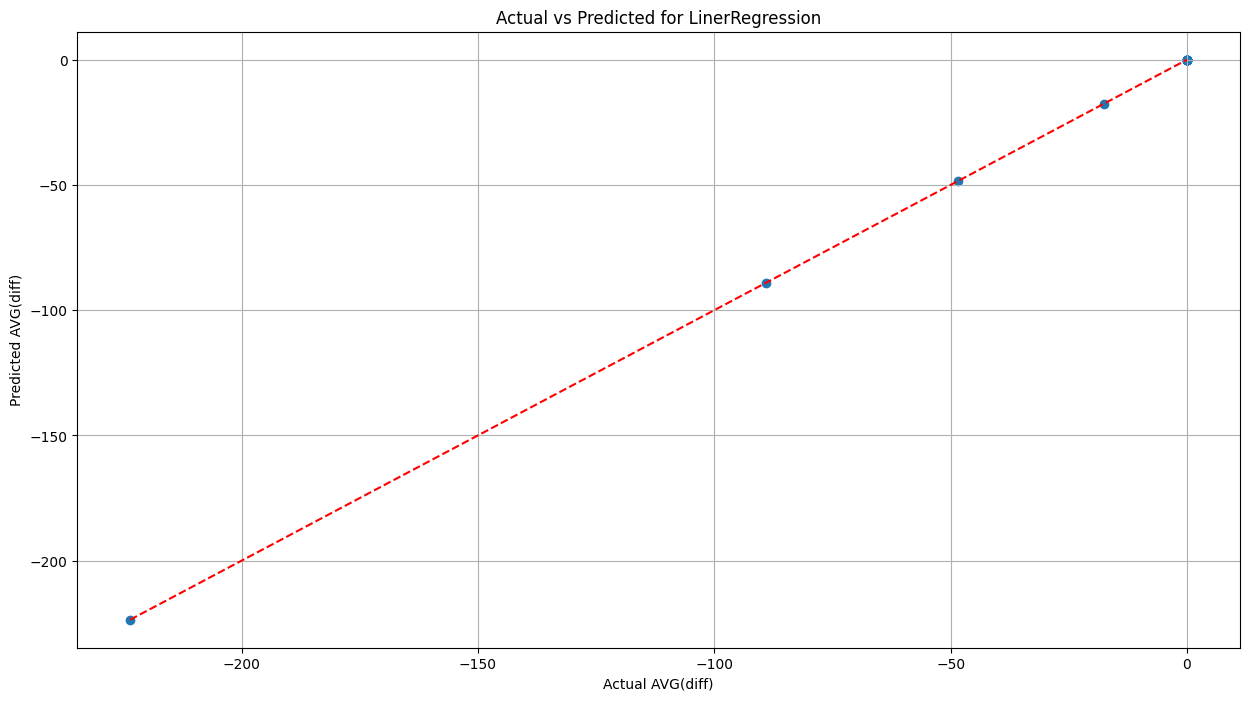

In [106]:
y_pred_lin = lin_reg.predict(X_test)

plt.figure(figsize=(15,8))

plt.scatter(y_test, y_pred_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Actual vs Predicted for LinerRegression')
plt.xlabel('Actual AVG(diff)')
plt.ylabel('Predicted AVG(diff)')
plt.grid()
plt.show()

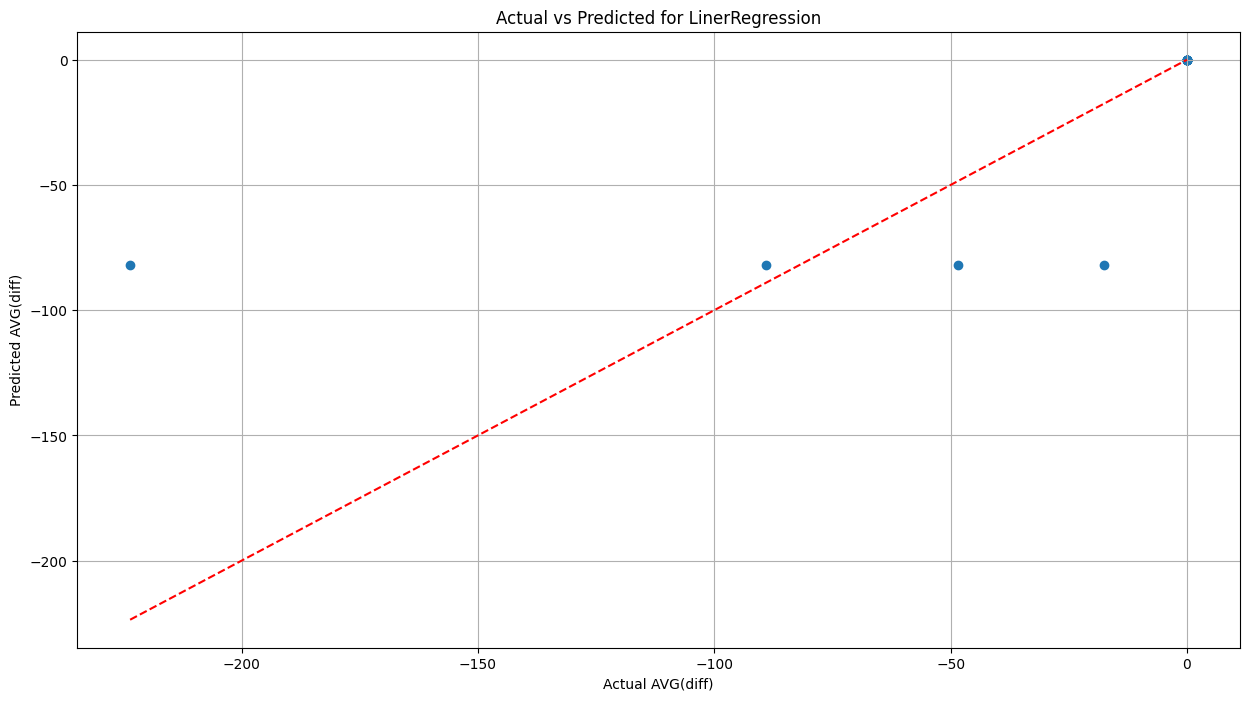

In [108]:
y_pred_tree = tree_reg.predict(X_test)

plt.figure(figsize=(15,8))

plt.scatter(y_test, y_pred_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Actual vs Predicted for LinerRegression')
plt.xlabel('Actual AVG(diff)')
plt.ylabel('Predicted AVG(diff)')
plt.grid()
plt.show()

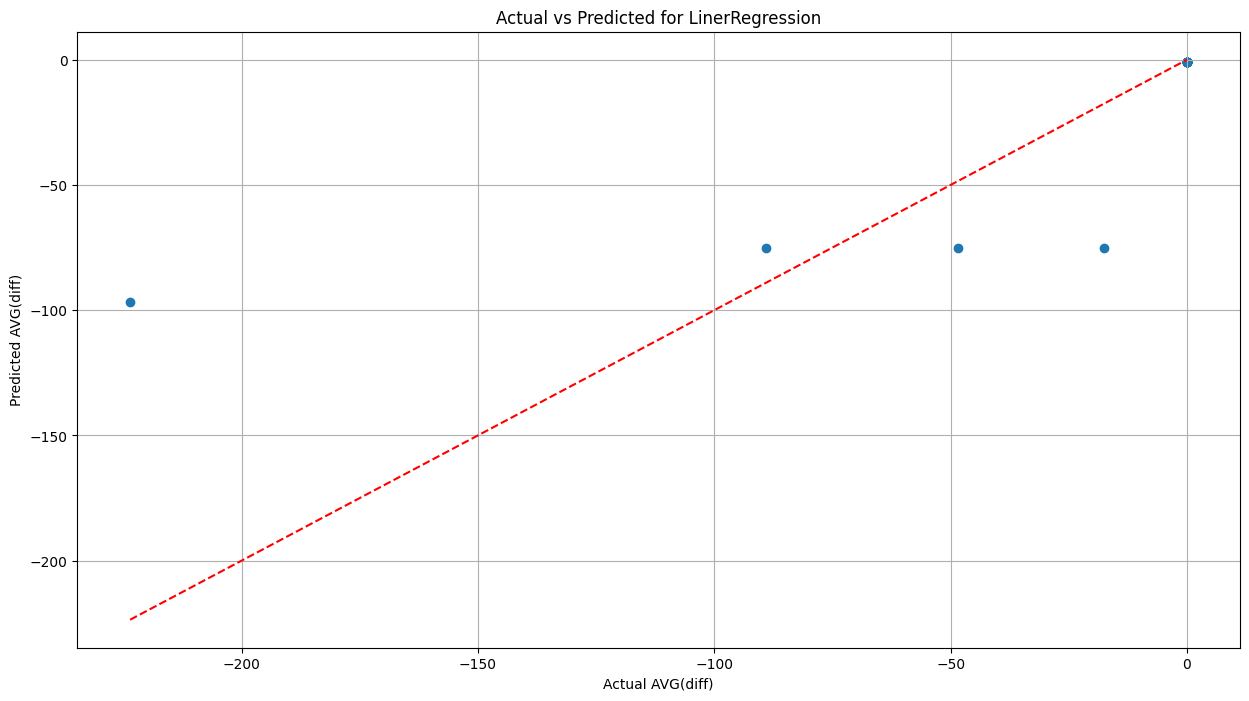

In [109]:
y_pred_forest = forest_reg.predict(X_test)

plt.figure(figsize=(15,8))

plt.scatter(y_test, y_pred_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Actual vs Predicted for LinerRegression')
plt.xlabel('Actual AVG(diff)')
plt.ylabel('Predicted AVG(diff)')
plt.grid()
plt.show()

В идеальном случае график выглядит как прямая